In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_csv('/Users/cesar/Desktop/tennis_atp/atp_matches_2010.csv')
for annee in range(2000, 2020):
    data = pd.concat([data, pd.read_csv('/Users/cesar/Desktop/tennis_atp/atp_matches_'+str(annee)+'.csv')], axis=0)

In [5]:
data.shape

(64694, 49)

In [6]:
data['tourney_date'] = pd.to_datetime(data['tourney_date'], yearfirst=True, format='%Y%m%d')

In [7]:
data.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,2010-01-03,1,104053,1,NaN,Andy Roddick,R,188.0,USA,27.348392,103429,NaN,NaN,Peter Luczak,R,183.0,AUS,30.346338,7-6(5) 6-2,3,R32,84.0,15.0,0.0,63.0,42.0,36.0,14.0,10.0,3.0,3.0,4.0,2.0,56.0,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0


In [8]:
data_winner = data[data.columns]
data_loser = data[data.columns]

In [9]:
data_winner.rename({'winner_name':'player_name'}, inplace=True)
data_loser.rename({'loser_name':'player_name'}, inplace=True)

In [10]:
data_winner['win_lose'] = ['w' for i in range(len(data_winner))]
data_winner['win_lose'] = ['l' for i in range(len(data_loser))]

In [11]:
data_winner = data_winner.rename(columns=lambda x: re.sub('winner','player',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('w_','player_',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('loser','opponent',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('l_','opponent_',x))

data_loser = data_loser.rename(columns=lambda x: re.sub('loser','player',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('l_','player_',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('winner','opponent',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('w_','opponent_',x))

In [12]:
data = pd.concat([data_winner, data_loser], axis=0)
data.reset_index(inplace=True, drop=True)

/anaconda3/envs/ASA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
data['year'] = data['tourney_date'].apply(lambda x: x.year)

In [ ]:
def plot_time_per_player(name):
    joueur = data[data['player_name']==name]
    moyenne_joueur = joueur['minutes'].mean()
    annees = ['year'].sort_values().unique()
    moyennes_annuelles = np.zeros(annees.shape[0])
    for i, annee in enumerate(annees):
        moyennes_annuelles = joueur[joueur['year']==annee]['minutes'].mean()
    

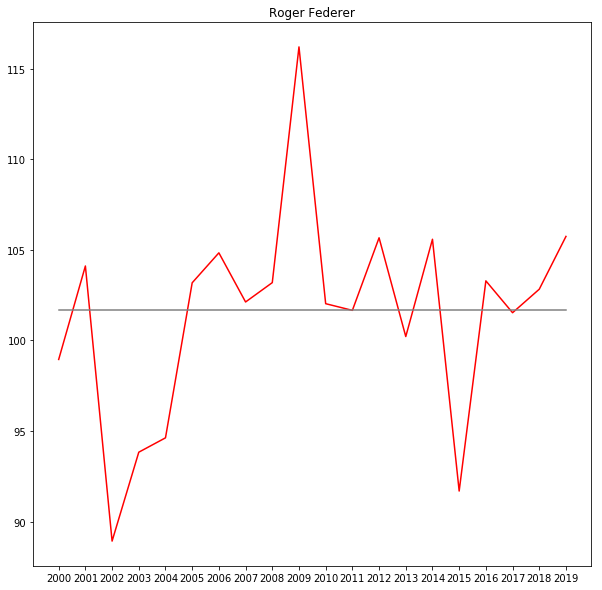

In [55]:
name = 'Roger Federer'
joueur = data[data['player_name']==name]
moyenne_joueur = joueur['minutes'].mean()
annees = joueur['year'].sort_values().unique()
moyennes_annuelles = np.zeros(annees.shape[0])
for i, annee in enumerate(annees):
    moyennes_annuelles[i] = joueur[joueur['year']==annee]['minutes'].mean()
plt.figure(figsize=(10,10))
plt.plot(annees, moyennes_annuelles, color="red")
plt.plot(annees, [moyenne_joueur for i in range(len(annees))], color='grey')
plt.title(name)
plt.xticks(annees.astype('int'))
plt.show()